# Income Statement Analyser
-----------------------------------------------

In [1]:
%matplotlib inline

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Javascript, display, HTML, Markdown as md
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

pd.set_option('display.float_format', lambda x: '%.3f' % x)


## Start by selecting a company


In [2]:
watchlist = [x[x.find("\\")+1:] for x in  glob("../data/*")]

# Default
stock = watchlist[0]

dropdown = widgets.Dropdown(options = watchlist)

def dropdown_eventhandler(change):
    global stock 
    stock = change.new
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
dropdown.observe(dropdown_eventhandler, names='value')

display(dropdown)

<IPython.core.display.Javascript object>

Dropdown(options=('ComfortDelGro Corporation Limited (C52.SI)', 'DBS Group Holdings Ltd (D05.SI)', 'SATS Ltd. …

Dropdown(options=('ComfortDelGro Corporation Limited (C52.SI)', 'DBS Group Holdings Ltd (D05.SI)', 'SATS Ltd. …

In [3]:
md("## Income Statement of {}".format(stock))

## Income Statement of ComfortDelGro Corporation Limited (C52.SI)

In [4]:
# Read data from Morningstar and set metrics as index
income = pd.read_excel("../data/" + stock + "/Income Statement_Annual_As Originally Reported.xls",  index_col=0)
income


,TTM,2019,2018,2017,2016,2015
Name,,,,,,
Gross Profit,"748,000,000","748,000,000","762,500,000","790,500,000","889,700,000","883,600,000"
Total Revenue,"3,905,700,000","3,905,700,000","3,805,200,000","3,970,900,000","4,059,500,000","4,111,500,000"
Business Revenue,"3,905,700,000","3,905,700,000","3,805,200,000","3,970,900,000","4,059,500,000","4,111,500,000"
Cost of Revenue,"-3,157,700,000","-3,157,700,000","-3,042,700,000","-3,180,400,000","-3,169,800,000","-3,227,900,000"
Cost of Goods and Services,"-293,900,000","-293,900,000","-299,900,000","-666,000,000","-714,900,000","-776,900,000"
Changes in Inventories,0,0,0,0,0,0
"Rent and Landing Fees, Cost of Revenue","-76,000,000","-76,000,000","-110,000,000","-107,400,000","-110,600,000","-107,200,000"
"Purchased Fuel, Power and Gas","-303,800,000","-303,800,000","-295,500,000","-236,800,000","-231,700,000","-301,700,000"
Operation Maintenance and Repairs,"-304,800,000","-304,800,000","-286,900,000","-266,200,000","-258,600,000","-249,300,000"


## Cleaning of data

In [5]:
# Remove whitespaces
income.index = income.index.str.strip()
# Transpose df to make metrics as columns
income = income.T
# Remove commas and convert str to float for all cols
income[income.keys()] = income[income.keys()].replace({',': ''}, regex=True).astype(float)/1000000
# Reorder the rows to be ascending downwards
income = income.sort_index()


# Revenue and Cost

**Revenue** is the money earned by selling goods or services to customers. The year-on-year revenue growth rate tells us the momentum of the company’s growth and earnings. If the growth rate is slowing, it means earnings would probably also slow down.

**Cost of Revenue/Cost of Goods Sold (COGs)** is the cost incurred to produce the goods/service that are sold. it is connected to the *Inventories* in the Balance Sheet. For example, if \\$20k worth of goods is being sold to the customers, then *Inventories* would deduct $20k and *COGs* would increase \\$20k.

**Cost of Operations/Operating Expenses** are expenses that are NOT related to making the goods/service a.k.a the cost to run the business e.g.  office rental, paying bills, paying employee salaries and etc  

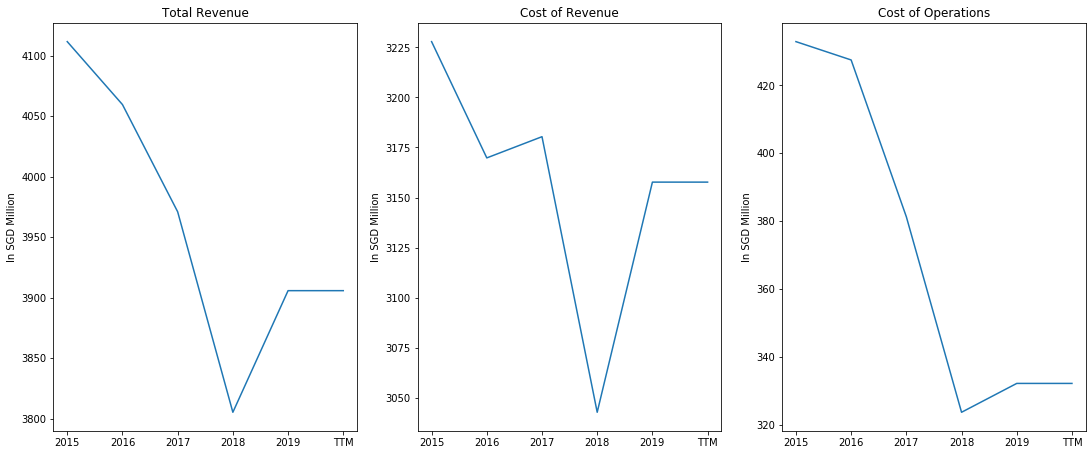

In [6]:
# Revenue, cost of revenue, operation cost
plotindex = 0
fig, axs = plt.subplots(1, 3 if 'Gross Profit' in income.columns else 2)
fig.set_size_inches(18.5, 7.5)
axs[plotindex].plot(income['Total Revenue'])
axs[plotindex].set_title('Total Revenue');
axs[plotindex].set_ylabel("In SGD Million");
plotindex+=1
# Banks dosen't have Revenue cost
if 'Cost of Revenue' in income.columns:
    axs[plotindex].plot(income['Cost of Revenue'].abs())
    axs[plotindex].set_title('Cost of Revenue');
    axs[plotindex].set_ylabel("In SGD Million");
    plotindex+=1
 
axs[plotindex].plot(income['Operating Income/Expenses' if 'Operating Income/Expenses' in income.columns else 'Non-Interest Expenses and Other Income'].abs())
axs[plotindex].set_title('Cost of Operations');
axs[plotindex].set_ylabel("In SGD Million");

## Revenue vs Gross Profit

**Gross Profit/Income** is calculated by taking revenue minus COGs. It represents the profits that are made from selling the product/services. Operating expenses is not deducted yet.

**Gross Profit Margin** is calculated by taking Gross Profits divided by Revenue. Gross profit margin % tells us how profitable it is in selling the product/services.

In [7]:
if 'Gross Profit' in income.columns:
    rgpmargin = (income['Gross Profit']/income['Total Revenue'])*100
    rgpmargin = pd.DataFrame(rgpmargin, columns = ['Gross Profit Margin'])
    pd.concat([income[['Total Revenue', 'Gross Profit']], rgpmargin], axis=1)
else:
    print("This company dosen't inccur revenue cost.")

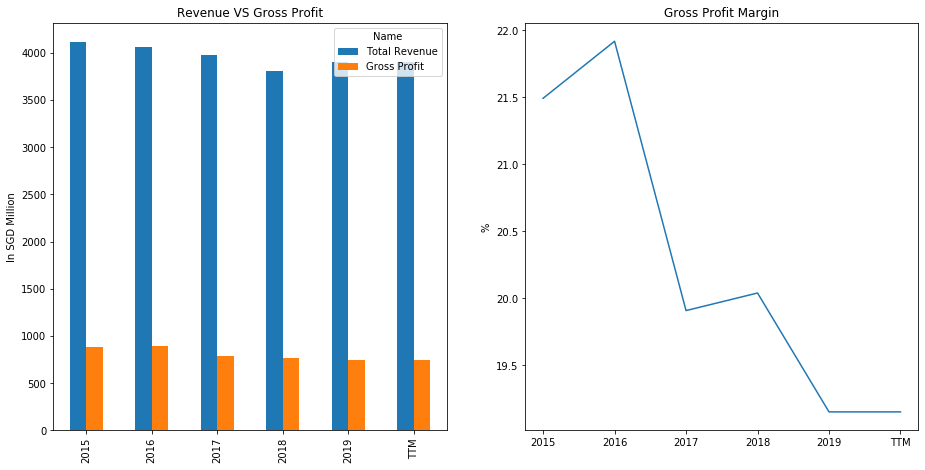

In [8]:
if 'Gross Profit' in income.columns:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(15.5, 7.5)

    income[['Total Revenue', 'Gross Profit']].plot.bar(ax=axs[0])
    axs[0].set_title('Revenue VS Gross Profit');
    axs[0].set_ylabel("In SGD Million");

    axs[1].plot(rgpmargin)
    axs[1].set_title('Gross Profit Margin');
    axs[1].set_ylabel("%");



## Operating profit vs Non-Operating profit & Pre-Tax Income

**Operating Profit** is the difference of Gross Profit and Operating Expenses

**Non-Operating Profit** is the money gained/loss from non operation activities e.g. investments 

**Pre-Tax Income (EBIT)** is the sum of Operating Profit and Non-Operating Profit

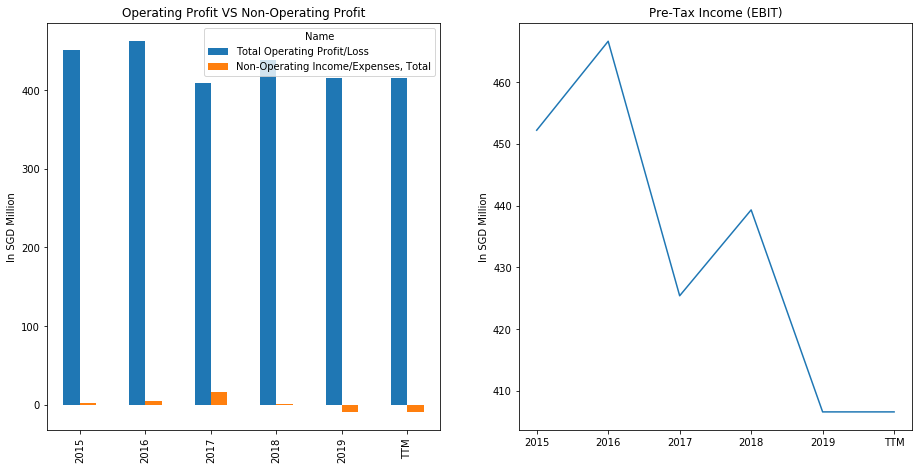

In [9]:
#Operation profit vs Non-Operation profit & Before tax

if 'Total Operating Profit/Loss' in income.columns:

    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(15.5, 7.5)

    income[['Total Operating Profit/Loss', 'Non-Operating Income/Expenses, Total']].plot.bar(ax=axs[0])
    axs[0].set_title('Operating Profit VS Non-Operating Profit');
    axs[0].set_ylabel("In SGD Million");

    axs[1].plot(income['Pretax Income'])
    axs[1].set_title('Pre-Tax Income (EBIT)');
    axs[1].set_ylabel("In SGD Million");

else:
    print("There is no Operating Profit/Non-Operating Profit for this company. Please see next section for EBIT data.")



## Gross Profit VS EBIT VS Net Profit

**Net Profit** is the resultant profit after deduction of income tax expenses and interest payment

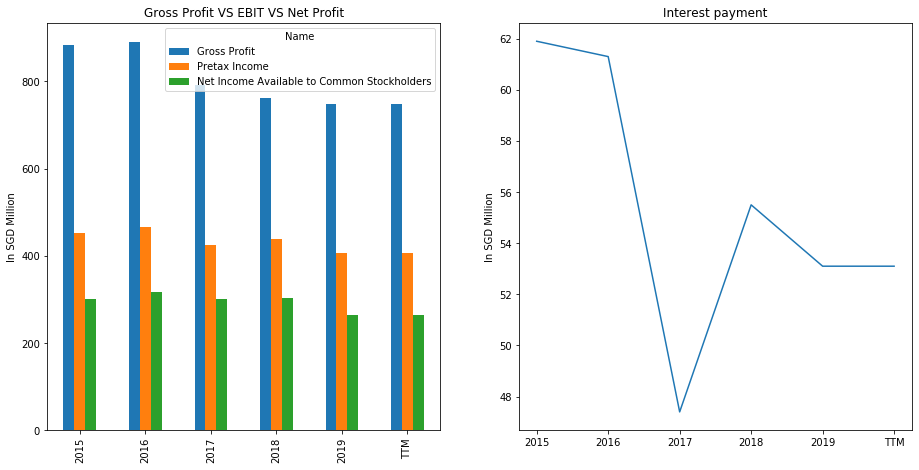

In [10]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15.5, 7.5)

if 'Gross Profit' in income.columns:
    income[['Gross Profit', 'Pretax Income', 'Net Income Available to Common Stockholders']].plot.bar(ax=axs[0])
    axs[0].set_title('Gross Profit VS EBIT VS Net Profit');
    axs[0].set_ylabel("In SGD Million");
else: 
    income[['Pretax Income', 'Net Income Available to Common Stockholders']].plot.bar(ax=axs[0])
    axs[0].set_title('EBIT VS Net Profit');
    axs[0].set_ylabel("In SGD Million");

axs[1].plot(income['Non-Controlling/Minority Interests'].abs())
axs[1].set_title('Interest payment');
axs[1].set_ylabel("In SGD Million");
